In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("Mall_Customers.csv")
print("Shape of data:", df.shape)
df.head()

Shape of data: (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [5]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


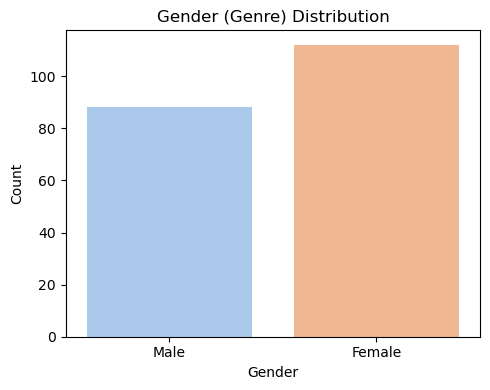

In [10]:
plt.figure(figsize=(5, 4))
sns.countplot(
    data=df,
    x='Genre',
    hue='Genre',         
    palette='pastel',
    legend=False          
)
plt.title("Gender (Genre) Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

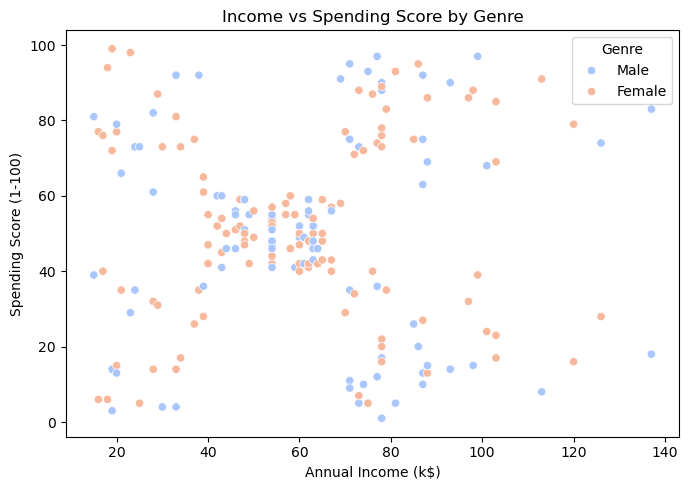

In [12]:
hue_col = 'Gender' if 'Gender' in df.columns else 'Genre'

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue=hue_col,
    palette='coolwarm'
)
plt.title(f"Income vs Spending Score by {hue_col}")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.tight_layout()
plt.show()

In [14]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

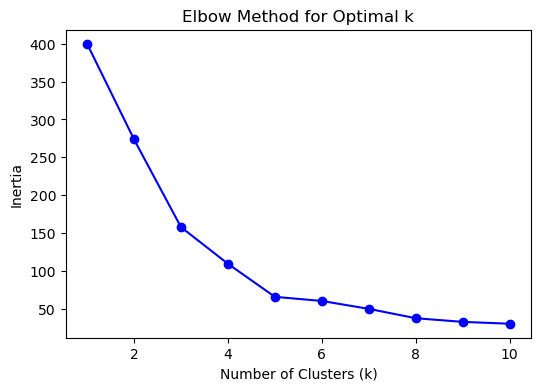

In [18]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [20]:
k_optimal = 4

In [22]:
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

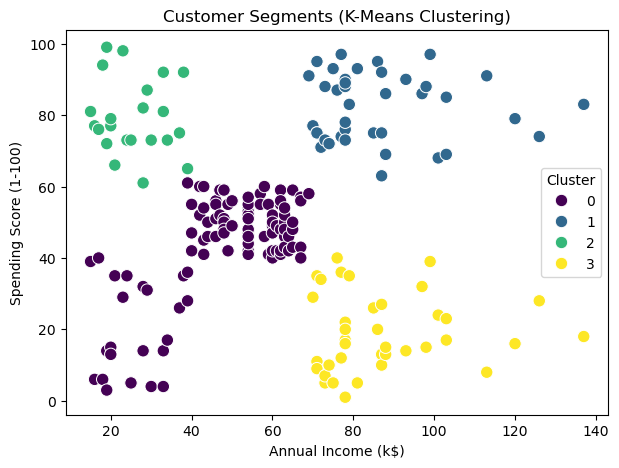

In [24]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    data=df,
    s=80
)
plt.title('Customer Segments (K-Means Clustering)')
plt.legend(title='Cluster')
plt.show()